In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:

# Load the dataset
df = pd.read_csv('/content/Life Expectancy Data.csv')

# Now you can work with the dataframe 'df'
# For example, print the first few rows:
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


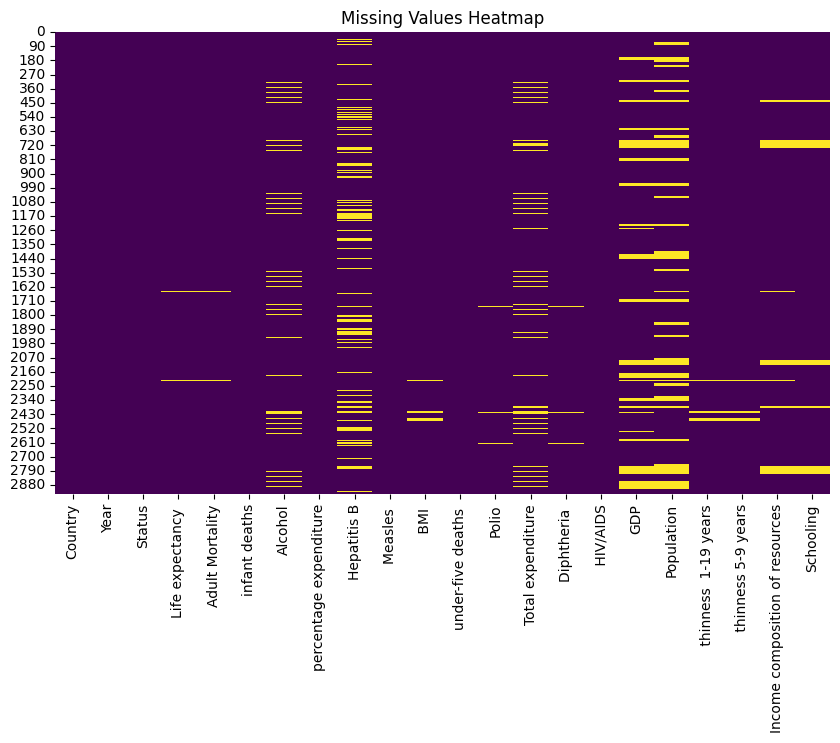

In [4]:
# prompt: is null

# Check for null values in each column
print(df.isnull().sum())

# Optionally, visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
# prompt: total number of row?

# Get the total number of rows
num_rows = len(df)
print(f"Total number of rows: {num_rows}")

Total number of rows: 2938


In [6]:
# Function to print skewness and basic statistics for columns with missing values
def summarize_missing_columns(df):
    columns_with_missing = df.columns[df.isnull().sum() > 0]
    print("Summary of Columns with Missing Values:")
    for col in columns_with_missing:
        print(f"\nColumn: {col}")
        print(f"Skewness: {df[col].skew():.2f}")
        print(df[col].describe())

# Call the function to summarize columns with missing values
summarize_missing_columns(df)

# Imputation based on numerical insights
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        if df[col].skew() < 1:  # Low skewness, use mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # High skewness, use median
            df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_columns = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm missing values are handled
print("\nRemaining Missing Values:")
print(df.isnull().sum())

Summary of Columns with Missing Values:

Column: Life expectancy 
Skewness: -0.64
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

Column: Adult Mortality
Skewness: 1.17
count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64

Column: Alcohol
Skewness: 0.59
count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: Alcohol, dtype: float64

Column: Hepatitis B
Skewness: -1.93
count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: floa

<ipython-input-6-36a2fa9c16e0>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-6-36a2fa9c16e0>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [7]:
# prompt: dtype

# Check data types of each column
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [8]:
import pandas as pd
import scipy.stats as stats

# Strip column names to remove any leading or trailing spaces
df.columns = df.columns.str.strip()

# Check if 'Country' exists in the dataset
if 'Country' in df.columns and 'Life expectancy' in df.columns:
    # Group data by countries and exclude countries with insufficient data
    valid_countries = [
        country for country in df['Country'].unique()
        if len(df.loc[df['Country'] == country, 'Life expectancy'].dropna()) > 1
    ]

    # Group Life Expectancy by valid countries
    country_groups = [
        df.loc[df['Country'] == country, 'Life expectancy'].dropna()
        for country in valid_countries
    ]

    # Perform one-way ANOVA if there are enough groups
    if len(country_groups) > 1:
        f_stat, p_value = stats.f_oneway(*country_groups)
        print("ANOVA Test for All Countries:")
        print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.5f}")

        # Interpretation:
        if p_value < 0.05:
            print("There is a statistically significant difference in 'Life expectancy' across all countries.")
        else:
            print("No statistically significant difference in 'Life expectancy' across all countries.")
    else:
        print("Insufficient valid groups for ANOVA.")
else:
    print("The required columns 'Country' or 'Life expectancy' are missing from the dataset.")

ANOVA Test for All Countries:
F-statistic: 187.71, P-value: 0.00000
There is a statistically significant difference in 'Life expectancy' across all countries.


In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
anova_results = {}

print("ANOVA Results:")
for col in categorical_columns:
    print(f"\nAnalyzing Column: {col}")
    groups = [df.loc[df[col] == category, 'Life expectancy'].dropna() for category in df[col].unique()]

    # Ensure there are at least two groups with valid data
    if len(groups) > 1 and all(len(group) > 0 for group in groups):
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = {'F-statistic': f_stat, 'P-value': p_value}

        # Print detailed results
        print(f"F-statistic: {f_stat:.2f}")
        print(f"P-value: {p_value:.5f}")
        if p_value < 0.05:
            print("=> Statistically significant difference in 'Life expectancy' across categories.")
        else:
            print("=> No statistically significant difference in 'Life expectancy' across categories.")
    else:
        print("=> Insufficient data for ANOVA (e.g., empty or single-value groups).")

ANOVA Results:

Analyzing Column: Country
F-statistic: 177.93
P-value: 0.00000
=> Statistically significant difference in 'Life expectancy' across categories.

Analyzing Column: Status
F-statistic: 888.35
P-value: 0.00000
=> Statistically significant difference in 'Life expectancy' across categories.


Correlation with 'Life expectancy':
Life expectancy                    1.000000
Schooling                          0.715066
Income composition of resources    0.692483
BMI                                0.559255
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430895
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Year                               0.169623
Population                        -0.028845
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
thinness 5-9 years                -0.461739
thinness  1-19 years              -0.467267
HIV/AIDS                          -0.556457
Adult Mortality                   -0.696326
Name: Life expectancy, dtype: float64


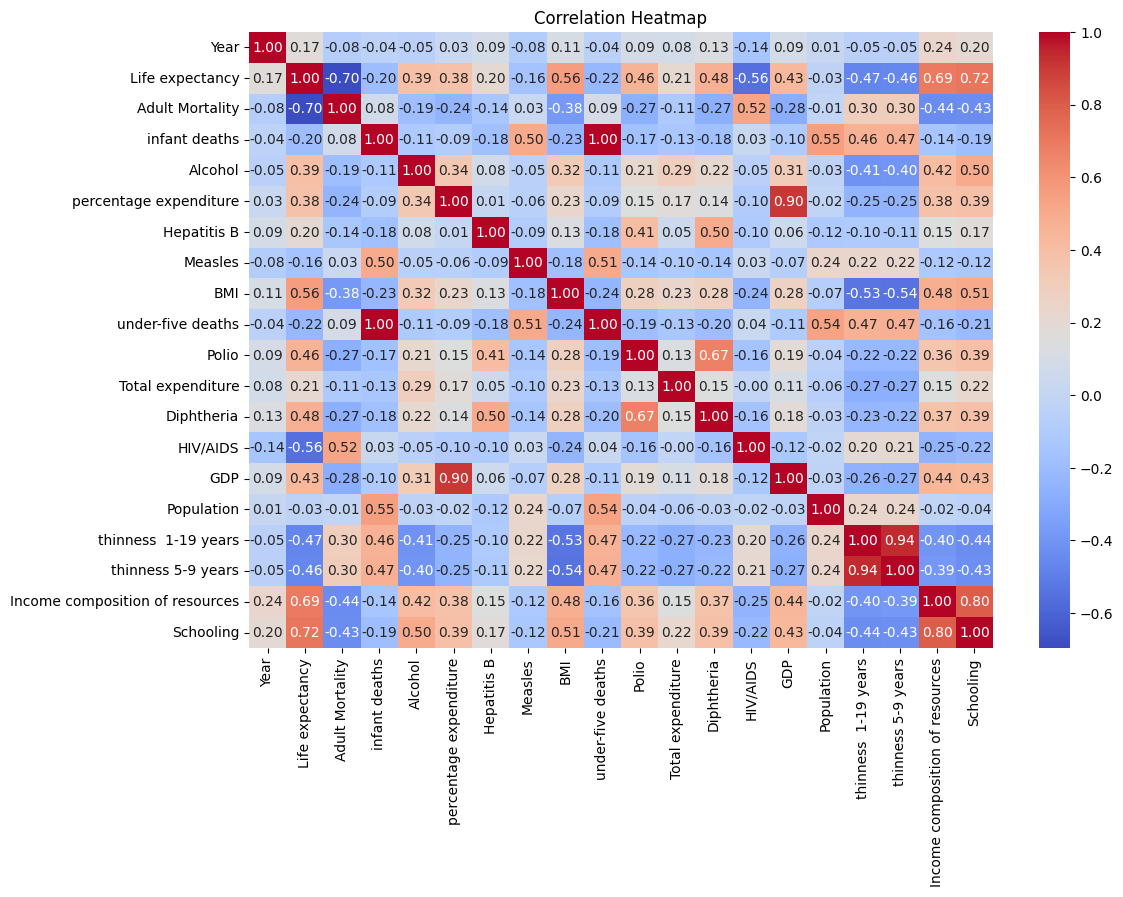

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure column names are clean
df.columns = df.columns.str.strip()

# Calculate correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

# Extract correlation with 'Life expectancy'
if 'Life expectancy' in correlation_matrix.columns:
    correlation_with_life_expectancy = correlation_matrix['Life expectancy'].sort_values(ascending=False)
    print("Correlation with 'Life expectancy':")
    print(correlation_with_life_expectancy)
else:
    print("Column 'Life expectancy' not found in numerical correlation matrix.")

# Visualize the correlation matrix with a heatmap (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Prepare the data for linear regression
X = df[['Schooling']]  # Independent variable (Schooling)
y = df['Life expectancy']  # Target variable (Life expectancy) # Remove the extra space from the column name

Mean Squared Error: 39.37139175574916
R-squared: 0.5455501135198606
Linear Regression Equation: Life expectancy = 44.22 + 2.08 * Schooling


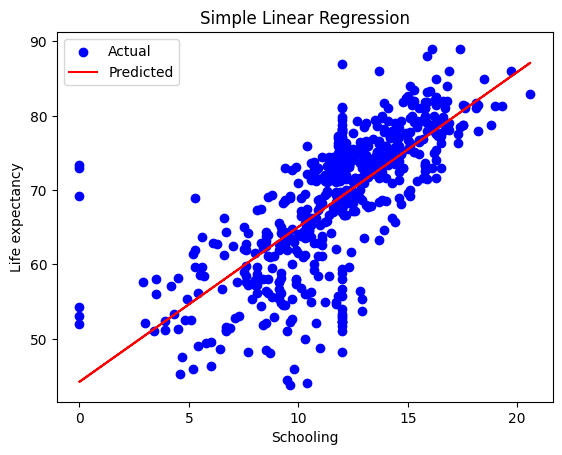

In [12]:
# prompt: Simple Linear Regression Equation for  my data with visulazation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the linear regression equation
print(f"Linear Regression Equation: Life expectancy = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Schooling")

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [13]:
# prompt: Multiple Linear Regression Equation

# Assuming you have already trained the model as shown in the previous code.
# The linear regression equation is already printed in the provided code:

# Print the linear regression equation
print(f"Linear Regression Equation: Life expectancy = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Schooling")

Linear Regression Equation: Life expectancy = 44.22 + 2.08 * Schooling


Mean Squared Error: 25.680950796710867
R-squared: 0.7035739745582374
Multiple Linear Regression Equation:
Life expectancy = 56.75
+ 0.94 * Schooling
+ 11.22 * Income composition of resources
+ -0.04 * Adult Mortality


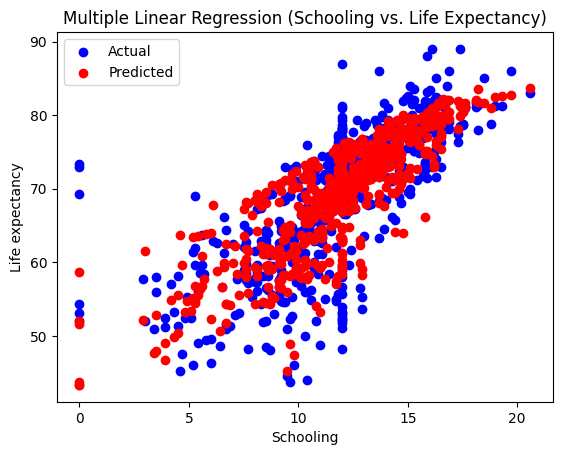

In [14]:
# prompt: multiple linear regression for my data

# Prepare the data for multiple linear regression
X = df[['Schooling', 'Income composition of resources', 'Adult Mortality']] # Independent variables
y = df['Life expectancy']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the multiple linear regression equation
print("Multiple Linear Regression Equation:")
print(f"Life expectancy = {model.intercept_:.2f}")
for i, coef in enumerate(model.coef_):
    print(f"+ {coef:.2f} * {X.columns[i]}")

# Visualize the actual vs. predicted values (for one of the independent variables)
plt.scatter(X_test['Schooling'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Schooling'], y_pred, color='red', label='Predicted')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.title('Multiple Linear Regression (Schooling vs. Life Expectancy)')
plt.legend()
plt.show()

In [15]:
# prompt: print my full Multiple Linear Regression Equation

print("Multiple Linear Regression Equation:")
print(f"Life expectancy = {model.intercept_:.2f}")
for i, coef in enumerate(model.coef_):
    print(f"+ {coef:.2f} * {X.columns[i]}")

Multiple Linear Regression Equation:
Life expectancy = 56.75
+ 0.94 * Schooling
+ 11.22 * Income composition of resources
+ -0.04 * Adult Mortality


In [16]:
# Print the full regression equation
print("\nFull Multiple Linear Regression Equation:")
intercept = model.intercept_  # Assign the intercept to the variable
coefficients = model.coef_    # Assign the coefficients to the variable
equation = f"Life Expectancy = {intercept:.2f} "
for feature, coef in zip(X.columns, coefficients):
    equation += f"+ ({coef:.2f} * {feature}) "
print(equation)


Full Multiple Linear Regression Equation:
Life Expectancy = 56.75 + (0.94 * Schooling) + (11.22 * Income composition of resources) + (-0.04 * Adult Mortality) 


              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       164.725664      30.303948   
std       4.613841         9.507640       124.086215     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.

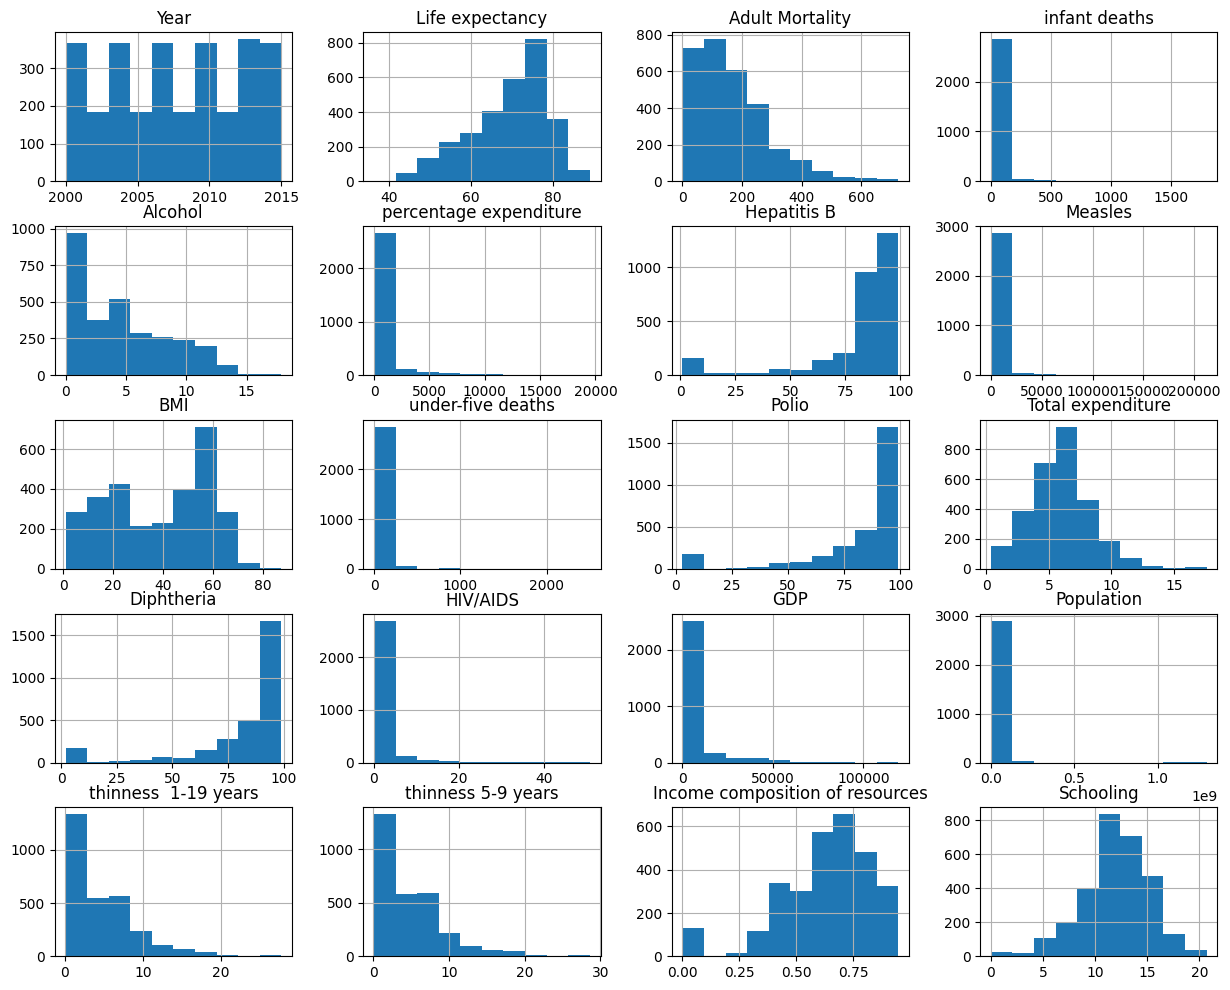

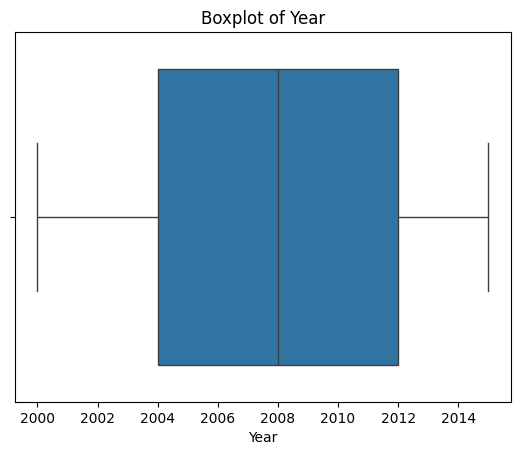

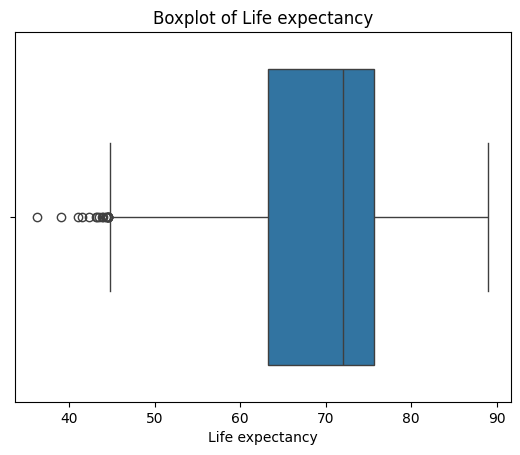

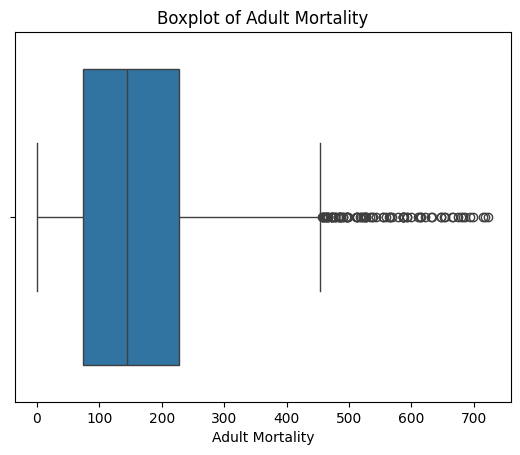

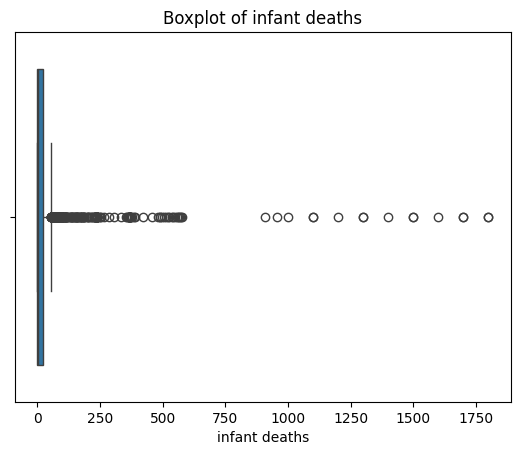

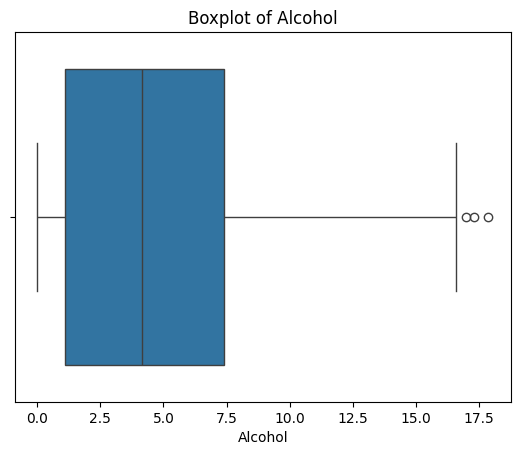

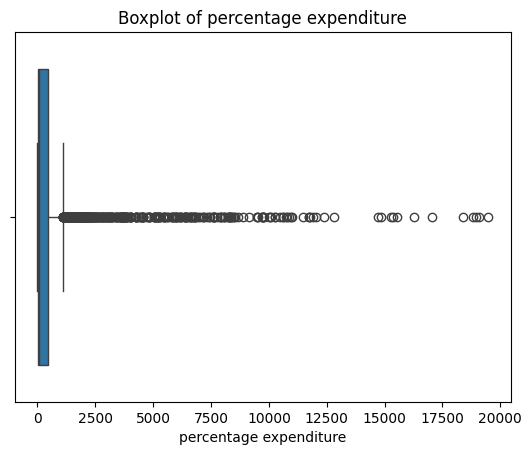

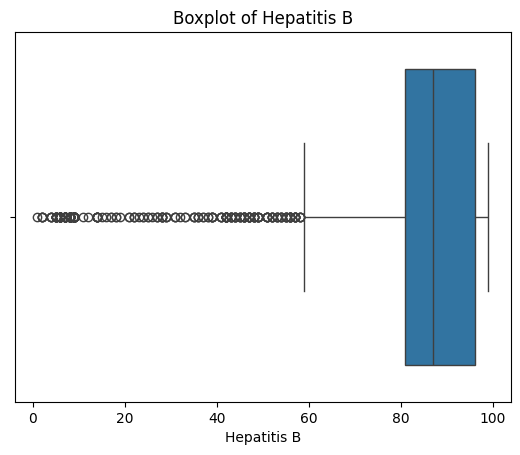

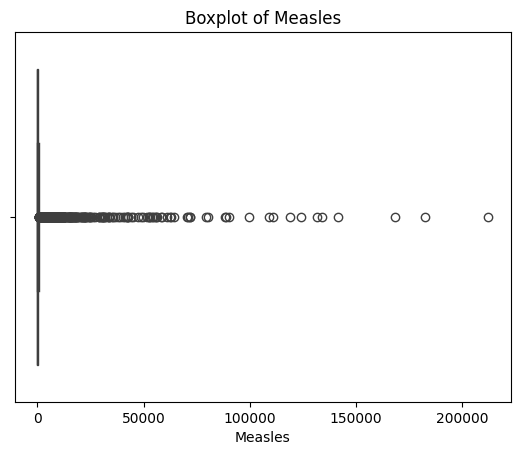

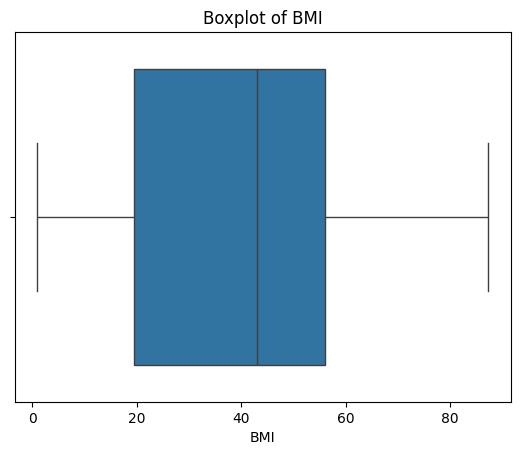

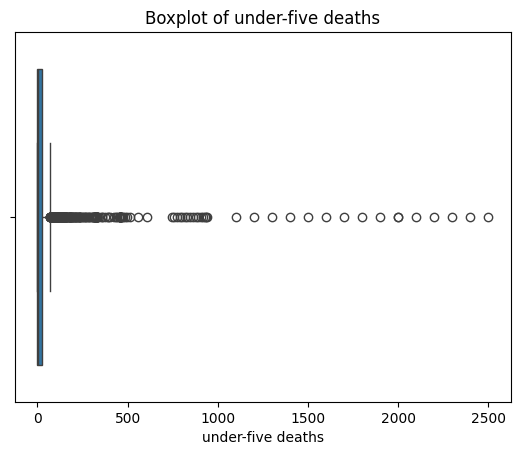

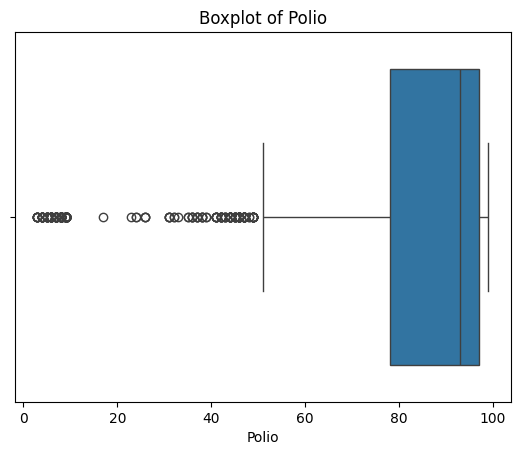

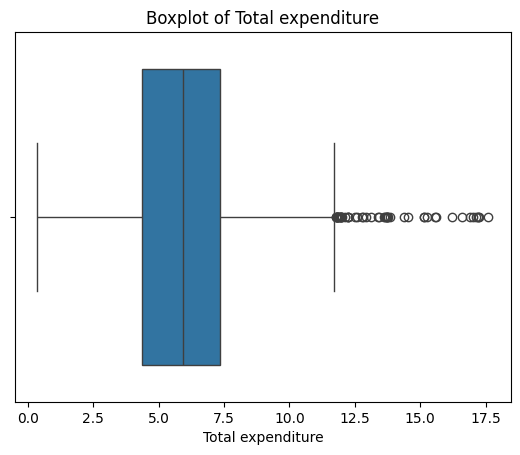

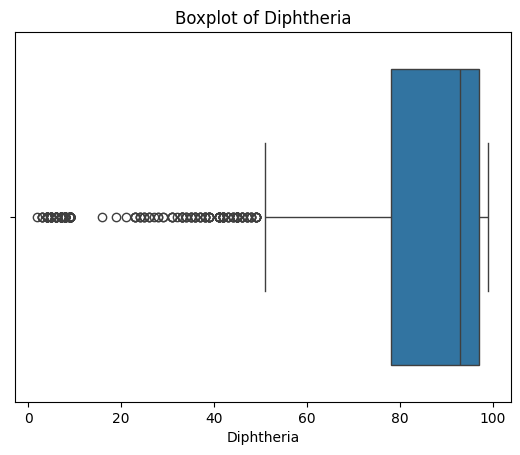

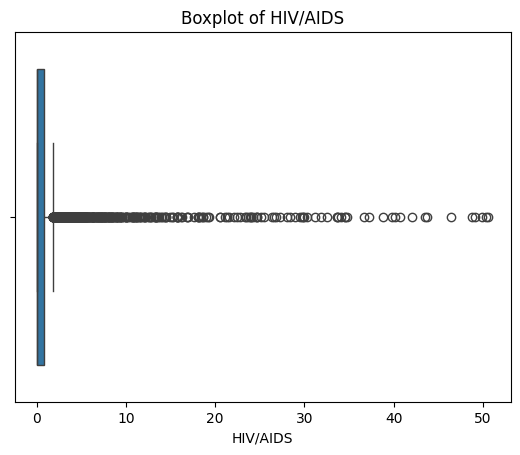

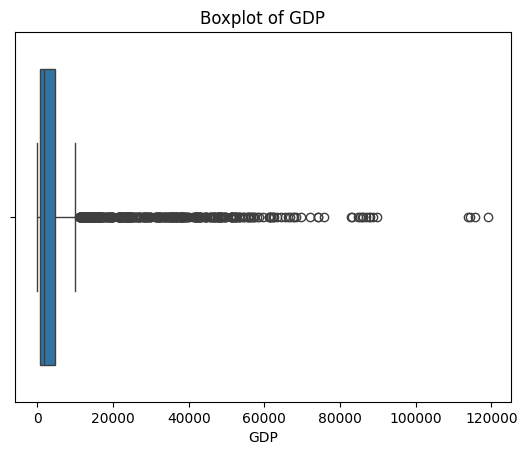

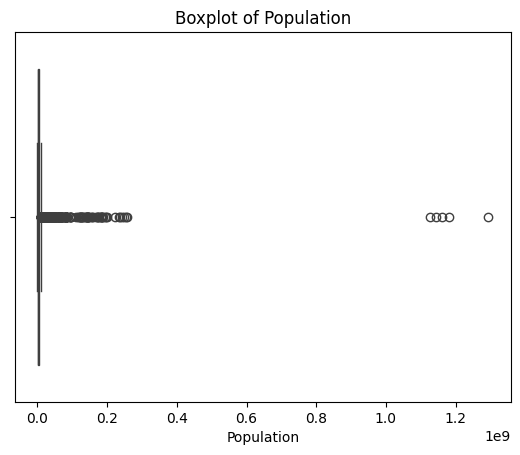

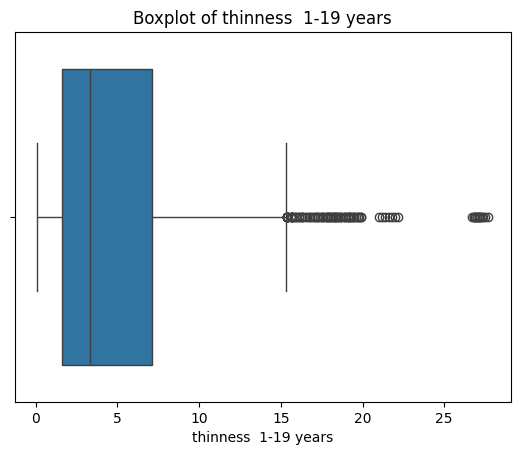

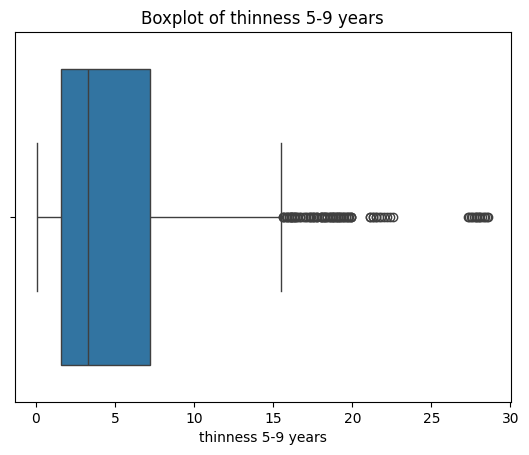

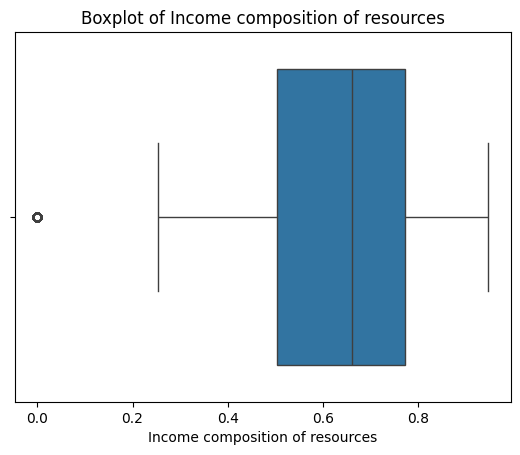

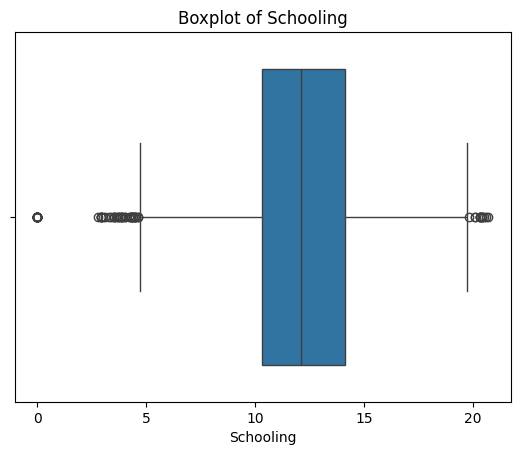

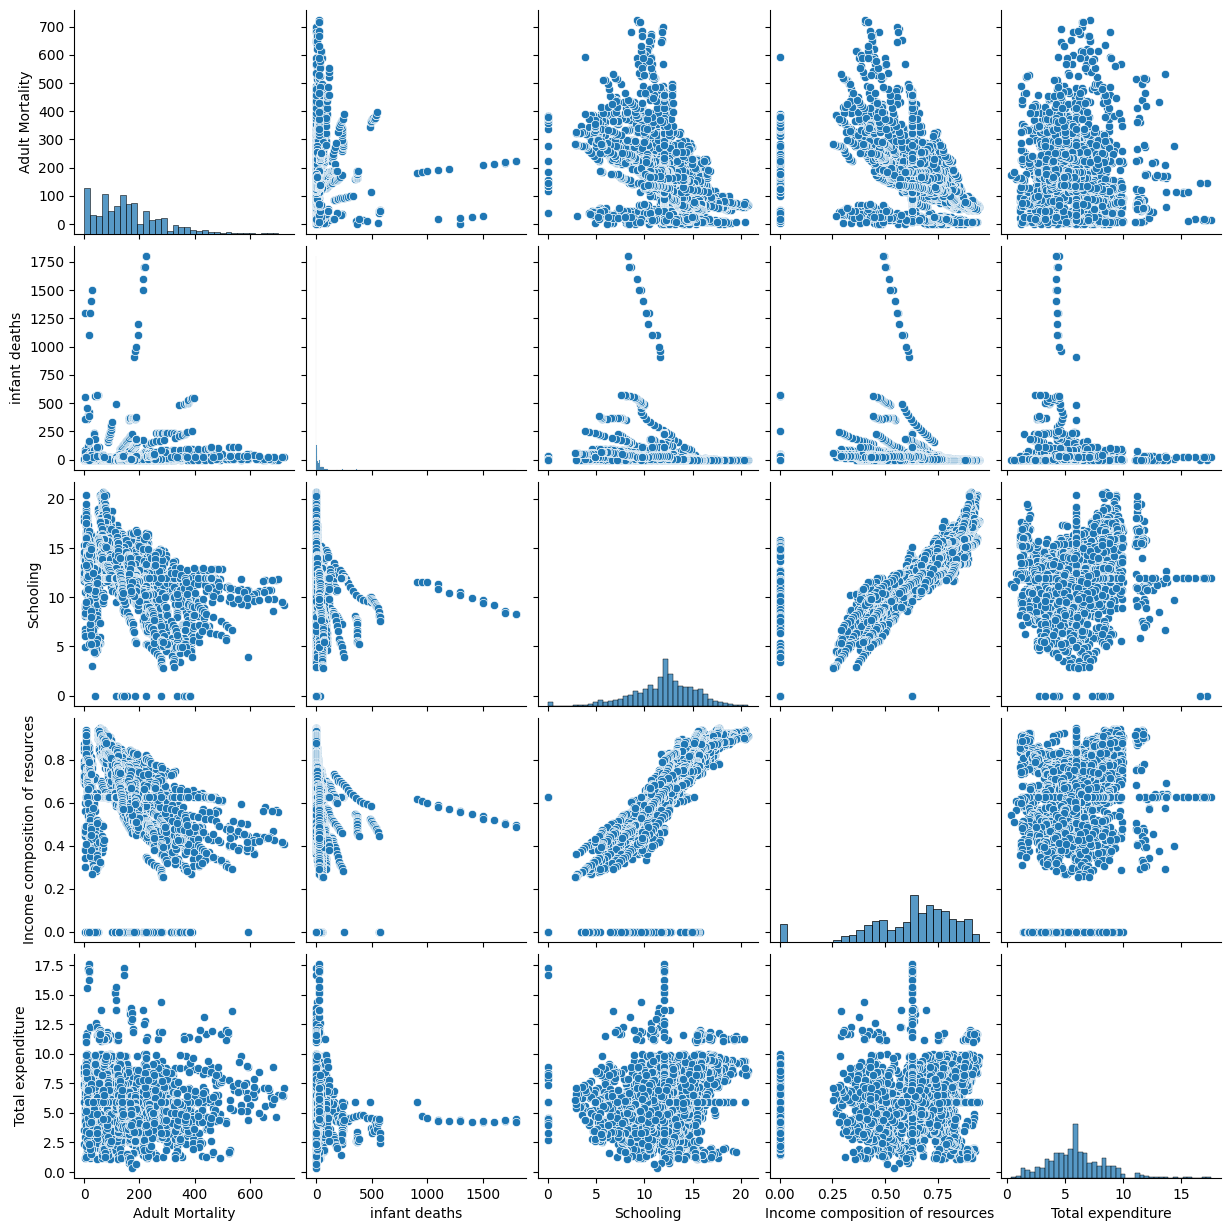

ValueError: could not convert string to float: 'Afghanistan'

<Figure size 1200x1000 with 0 Axes>

In [21]:
# prompt: eda for the df

# Assuming df is already loaded and preprocessed as in the provided code.

# Summary statistics
print(df.describe())

# Info about the DataFrame
print(df.info())

# Histograms for numerical features
df.hist(figsize=(15, 12))
plt.show()

# Box plots for numerical features
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Pairplot for selected numerical features (reduce if too many)
selected_numerical_cols = ['Adult Mortality', 'infant deaths', 'Schooling', 'Income composition of resources', 'Total expenditure']
sns.pairplot(df[selected_numerical_cols])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# Count plots for categorical features
for col in df.select_dtypes(include=['object']).columns:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()

